In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pytz

from fps_dfs_optimizer.src.draftkings_tools import EntriesHandler
from fps_dfs_optimizer.src.optimizer import Reoptimizer
from fps_dfs_optimizer.src.generator import LineupGenerator

In [2]:
cols = ['Name', 'ID', 'Position', 'Salary', 'Status', 'TeamAbbrev', 'Time', 'projections', 'std', 'min_exp', 'max_exp']
df_players = pd.read_csv('../data/raw/test_20200102.csv')
time = dt.datetime.now(pytz.UTC)
times = []
for p in range(len(df_players)):
    k = np.random.choice(2)
    m = np.random.choice(2)
    times += [dt.datetime(time.year, time.month, time.day+1, time.hour + 2 * k - 1, time.minute + m, 0, 0, pytz.UTC)]# + 2 * k - 1

df_players['Time'] = times
df_players = df_players[cols]
df_players = df_players.sort_values(by='projections', ascending=False).iloc[:-80]
df_players.head()

,Name,ID,Position,Salary,Status,TeamAbbrev,Time,projections,std,min_exp,max_exp
138,Luka Doncic,14065963,PG/SG,12000,recent,MIA,2020-10-14 01:56:00+00:00,55.22,16.508825,0,0.4
121,Spencer Dinwiddie,14065998,PG/SG,8300,recent,HOU,2020-10-14 01:56:00+00:00,49.11,13.076647,0,0.4
50,Jimmy Butler,14065989,SG/SF,8600,recent,HOU,2020-10-14 03:56:00+00:00,46.37,6.766692,0,0.4
202,Andre Drummond,14065969,C,9800,recent,MIA,2020-10-14 01:56:00+00:00,44.35,5.371722,0,0.4
199,Kawhi Leonard,14065971,SF/PF,9500,recent,MIL,2020-10-14 03:56:00+00:00,44.14,4.993913,0,0.4


In [3]:
def get_new_projections(df):
    return df['projections'] * (1 + np.random.uniform(0.4) - 0.2)

In [4]:
df_players['projections'] = get_new_projections(df_players)

In [5]:
df_players['locked'] = df_players['Time'] < time

In [6]:
sheet_name = 'test_DKEntries4_v2.csv'
entries = EntriesHandler('../data/raw/' + sheet_name, df_players, read_lineups=True)

In [7]:
entries.infer_max_exps()

In [8]:
# reopt = Reoptimizer(entries, verbose=True, solver='cbc', executable='../../Cbc-refactor-win64-msvc14-mdd/bin/cbc', timelimit=60, visualize=True)
reopt = Reoptimizer(entries, verbose=True, solver='glpk', timelimit=60, mipgap=0.002, visualize=True)

In [9]:
reopt.initialize()

Unfilled spots remaining: 1200


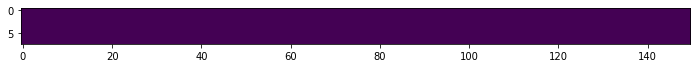

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\rcpat\AppData\Local\Temp\tmpdfw8nitn.glpk.raw --wglp C:\Users\rcpat\AppData\Local\Temp\tmp_yz2ygfj.glpk.glp
 --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpzv31dc_u.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpzv31dc_u.pyomo.lp'...
44225 rows, 78301 columns, 704701 non-zeros
993984 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmp_yz2ygfj.glpk.glp'...
1028055 lines were written
GLPK Simplex Optimizer, v4.65
44225 rows, 78301 columns, 704701 non-zeros
Preprocessing...
23537 rows, 78300 columns, 548100 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.200e+01  ratio =  1.200e+01
GM: min|aij| =  7.129e-01  max|aij| =  1.403e+00  ratio =  1.967e+00
EQ: min|aij| =  5.083e-01  max|aij| =  1.000e+00  ratio =  1.967e+00
Constructing initial basis...
Size of triangular part is 23537
      0: obj =  -0.000000000e+00 inf =   1.720e+03 (

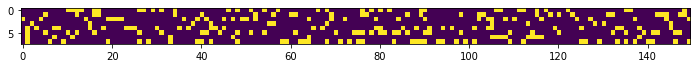

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpnx05x7v4.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpuhtsak49.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpbrvaoqtx.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpbrvaoqtx.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpbrvaoqtx.pyomo.lp:983371: warning: lower bound of variable 'x25' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpbrvaoqtx.pyomo.lp:983371: warning: upper bound of variable 'x25' redefined
44225 rows, 77336 columns, 696016 non-zeros
195 integer variables, all of which are binary
983566 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpuhtsak49.glpk.glp'...
1016282 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77336 columns, 696016 non-zeros
195 integer variables, all of which are binary
Preprocessing...
4286 rows, 15745 columns, 101601 

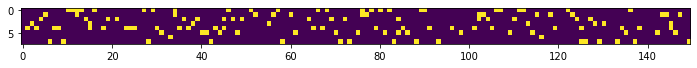

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpa1lk6qxk.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmp6z6az30e.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpl9e_tbh6.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpl9e_tbh6.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpl9e_tbh6.pyomo.lp:982205: warning: lower bound of variable 'x42' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpl9e_tbh6.pyomo.lp:982205: warning: upper bound of variable 'x42' redefined
44225 rows, 77230 columns, 695062 non-zeros
207 integer variables, all of which are binary
982412 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmp6z6az30e.glpk.glp'...
1014998 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77230 columns, 695062 non-zeros
207 integer variables, all of which are binary
Preprocessing...
968 rows, 7568 columns, 45429 non

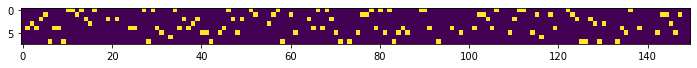

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpkebhg29a.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpdmwzt115.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmphyp6bfgh.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmphyp6bfgh.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmphyp6bfgh.pyomo.lp:982007: warning: lower bound of variable 'x42' redefined
C:\Users\rcpat\AppData\Local\Temp\tmphyp6bfgh.pyomo.lp:982007: warning: upper bound of variable 'x42' redefined
44225 rows, 77212 columns, 694900 non-zeros
262 integer variables, all of which are binary
982269 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpdmwzt115.glpk.glp'...
1014727 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77212 columns, 694900 non-zeros
262 integer variables, all of which are binary
Preprocessing...
676 rows, 6474 columns, 38251 non

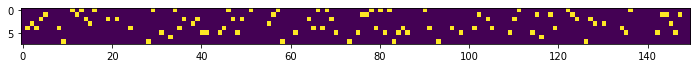

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmp083hn4or.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmp2pfabent.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmp12b5zo78.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmp12b5zo78.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmp12b5zo78.pyomo.lp:981798: warning: lower bound of variable 'x42' redefined
C:\Users\rcpat\AppData\Local\Temp\tmp12b5zo78.pyomo.lp:981798: warning: upper bound of variable 'x42' redefined
44225 rows, 77193 columns, 694729 non-zeros
351 integer variables, all of which are binary
982149 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmp2pfabent.glpk.glp'...
1014410 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77193 columns, 694729 non-zeros
351 integer variables, all of which are binary
Preprocessing...
547 rows, 5080 columns, 29108 non

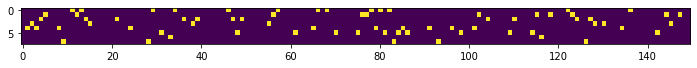

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmp4_u3k7zb.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpyhj4zv15.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpi_yj_vjb.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpi_yj_vjb.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpi_yj_vjb.pyomo.lp:981578: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpi_yj_vjb.pyomo.lp:981578: warning: upper bound of variable 'x59' redefined
44225 rows, 77173 columns, 694549 non-zeros
436 integer variables, all of which are binary
982014 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpyhj4zv15.glpk.glp'...
1014085 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77173 columns, 694549 non-zeros
436 integer variables, all of which are binary
Preprocessing...
415 rows, 3883 columns, 21407 non

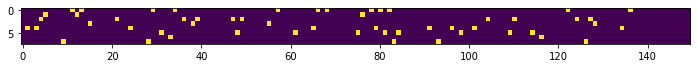

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpmkt2i0wr.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpkgae8geg.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmp8m071038.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmp8m071038.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmp8m071038.pyomo.lp:981380: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmp8m071038.pyomo.lp:981380: warning: upper bound of variable 'x59' redefined
44225 rows, 77155 columns, 694387 non-zeros
515 integer variables, all of which are binary
981895 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpkgae8geg.glpk.glp'...
1013790 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77155 columns, 694387 non-zeros
515 integer variables, all of which are binary
Preprocessing...
283 rows, 2932 columns, 14943 non

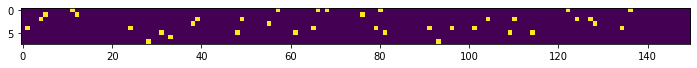

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpnvqa5rd3.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpzp1nwdco.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpwc7gb465.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpwc7gb465.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpwc7gb465.pyomo.lp:981193: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpwc7gb465.pyomo.lp:981193: warning: upper bound of variable 'x59' redefined
44225 rows, 77138 columns, 694234 non-zeros
570 integer variables, all of which are binary
981763 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpzp1nwdco.glpk.glp'...
1013531 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77138 columns, 694234 non-zeros
570 integer variables, all of which are binary
Preprocessing...
190 rows, 1807 columns, 9084 non-

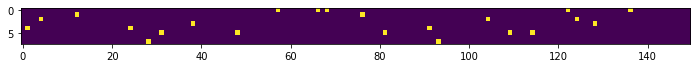

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpm8ilhqzw.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmplc3jhrbk.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpjtk9lzjt.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpjtk9lzjt.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpjtk9lzjt.pyomo.lp:981028: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpjtk9lzjt.pyomo.lp:981028: warning: upper bound of variable 'x59' redefined
44225 rows, 77123 columns, 694099 non-zeros
600 integer variables, all of which are binary
981628 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmplc3jhrbk.glpk.glp'...
1013321 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77123 columns, 694099 non-zeros
600 integer variables, all of which are binary
Preprocessing...
112 rows, 1123 columns, 5625 non-

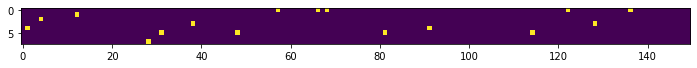

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpip7isqh3.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpnudueftv.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpqnex1k9p.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpqnex1k9p.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpqnex1k9p.pyomo.lp:980962: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpqnex1k9p.pyomo.lp:980962: warning: upper bound of variable 'x59' redefined
44225 rows, 77117 columns, 694045 non-zeros
625 integer variables, all of which are binary
981587 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpnudueftv.glpk.glp'...
1013224 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77117 columns, 694045 non-zeros
625 integer variables, all of which are binary
Preprocessing...
80 rows, 756 columns, 3780 non-ze

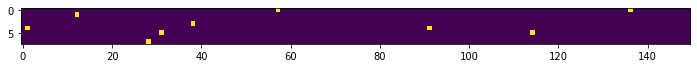

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpqpgab0gg.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpke6givyx.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpgg9g0cnz.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpgg9g0cnz.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpgg9g0cnz.pyomo.lp:980885: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpgg9g0cnz.pyomo.lp:980885: warning: upper bound of variable 'x59' redefined
44225 rows, 77110 columns, 693982 non-zeros
637 integer variables, all of which are binary
981522 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpke6givyx.glpk.glp'...
1013128 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77110 columns, 693982 non-zeros
637 integer variables, all of which are binary
Preprocessing...
45 rows, 436 columns, 2180 non-ze

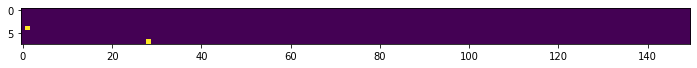

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpd7988en_.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpylwhl9p9.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmpz1topy8r.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmpz1topy8r.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmpz1topy8r.pyomo.lp:980808: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmpz1topy8r.pyomo.lp:980808: warning: upper bound of variable 'x59' redefined
44225 rows, 77103 columns, 693919 non-zeros
636 integer variables, all of which are binary
981444 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpylwhl9p9.glpk.glp'...
1013045 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77103 columns, 693919 non-zeros
636 integer variables, all of which are binary
Preprocessing...
10 rows, 144 columns, 720 non-zer

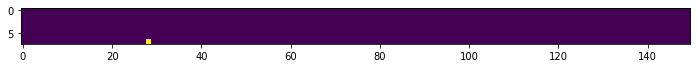

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmphn995jmd.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmpomsbkvwx.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmp_zti342j.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmp_zti342j.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmp_zti342j.pyomo.lp:980797: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmp_zti342j.pyomo.lp:980797: warning: upper bound of variable 'x59' redefined
44225 rows, 77102 columns, 693910 non-zeros
637 integer variables, all of which are binary
981434 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmpomsbkvwx.glpk.glp'...
1013032 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77102 columns, 693910 non-zeros
637 integer variables, all of which are binary
Preprocessing...
5 rows, 115 columns, 575 non-zero

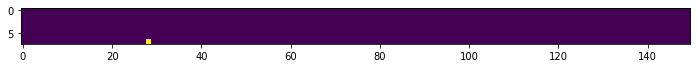

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmpen79zkxj.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmp9qu2hbem.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmp4pz2e80p.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmp4pz2e80p.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmp4pz2e80p.pyomo.lp:980797: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmp4pz2e80p.pyomo.lp:980797: warning: upper bound of variable 'x59' redefined
44225 rows, 77102 columns, 693910 non-zeros
639 integer variables, all of which are binary
981436 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmp9qu2hbem.glpk.glp'...
1013030 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77102 columns, 693910 non-zeros
639 integer variables, all of which are binary
Preprocessing...
5 rows, 114 columns, 570 non-zero

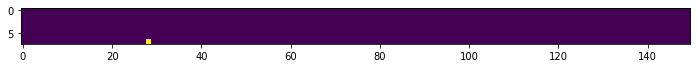

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.002 --tmlim 60 --write C:\Users\rcpat\AppData\Local\Temp\tmp7w1w78eq.glpk.raw
 --wglp C:\Users\rcpat\AppData\Local\Temp\tmp2i9qml5g.glpk.glp --cpxlp C:\Users\rcpat\AppData\Local\Temp\tmp993r7g6k.pyomo.lp
Reading problem data from 'C:\Users\rcpat\AppData\Local\Temp\tmp993r7g6k.pyomo.lp'...
C:\Users\rcpat\AppData\Local\Temp\tmp993r7g6k.pyomo.lp:980797: warning: lower bound of variable 'x59' redefined
C:\Users\rcpat\AppData\Local\Temp\tmp993r7g6k.pyomo.lp:980797: warning: upper bound of variable 'x59' redefined
44225 rows, 77102 columns, 693910 non-zeros
641 integer variables, all of which are binary
981438 lines were read
Writing problem data to 'C:\Users\rcpat\AppData\Local\Temp\tmp2i9qml5g.glpk.glp'...
1013028 lines were written
GLPK Integer Optimizer, v4.65
44225 rows, 77102 columns, 693910 non-zeros
641 integer variables, all of which are binary
Preprocessing...
5 rows, 113 columns, 565 non-zero

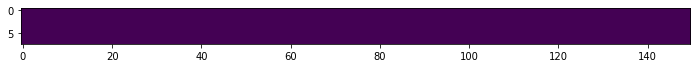

In [10]:
reopt.solve()

In [11]:
fast_opt = LineupGenerator(df_players, n_lineups_to_optimize=150, batch_size=20, drop_fraction=0.1, time_limit=5, verbose=False)
fast_opt.generate(fast_opt.n_lineups_to_optimize)

1 Infeasible lineups dropped
18 Lineups
0 Duplicates
0 Infeasible lineups dropped
37 Lineups
0 Duplicates
1 Infeasible lineups dropped
52 Lineups
2 Duplicates
0 Infeasible lineups dropped
67 Lineups
6 Duplicates
0 Infeasible lineups dropped
82 Lineups
9 Duplicates
1 Infeasible lineups dropped
91 Lineups
18 Duplicates
1 Infeasible lineups dropped
102 Lineups
24 Duplicates
2 Infeasible lineups dropped
110 Lineups
29 Duplicates
1 Infeasible lineups dropped
120 Lineups
35 Duplicates
0 Infeasible lineups dropped
130 Lineups
45 Duplicates
0 Infeasible lineups dropped
142 Lineups
52 Duplicates
0 Infeasible lineups dropped
147 Lineups
54 Duplicates
1 Infeasible lineups dropped
147 Lineups
56 Duplicates
1 Infeasible lineups dropped
149 Lineups
56 Duplicates
0 Infeasible lineups dropped
150 Lineups
56 Duplicates


,PG,SG,SF,PF,C,G,F,UTIL
0,Spencer Dinwiddie,Dillon Brooks,Bojan Bogdanovic,Domantas Sabonis,Ivica Zubac,Collin Sexton,Jimmy Butler,Jalen Brunson
1,Zach LaVine,Spencer Dinwiddie,Dillon Brooks,Bojan Bogdanovic,Marquese Chriss,Darius Garland,Jimmy Butler,Gary Harris
2,Spencer Dinwiddie,Kevin Porter,Buddy Hield,Bojan Bogdanovic,Ivica Zubac,De'Aaron Fox,Domantas Sabonis,Gary Harris
3,Darius Garland,Collin Sexton,Dillon Brooks,Bojan Bogdanovic,Domantas Sabonis,Aaron Holiday,DeMar DeRozan,De'Aaron Fox
4,Collin Sexton,Kevin Porter,Buddy Hield,Domantas Sabonis,Ivica Zubac,De'Aaron Fox,Jimmy Butler,Gary Harris
...,...,...,...,...,...,...,...,...
145,Collin Sexton,Buddy Hield,DeMar DeRozan,Marquese Chriss,Ivica Zubac,De'Aaron Fox,Domantas Sabonis,Gary Harris
146,Spencer Dinwiddie,Dillon Brooks,Cedi Osman,Marquese Chriss,Ivica Zubac,De'Aaron Fox,DeMar DeRozan,Donovan Mitchell
147,Spencer Dinwiddie,Buddy Hield,Bojan Bogdanovic,Robert Covington,Ivica Zubac,Aaron Holiday,Jimmy Butler,Gary Harris
148,De'Aaron Fox,Dillon Brooks,Jimmy Butler,Bojan Bogdanovic,Ivica Zubac,Donovan Mitchell,DeMar DeRozan,Jalen Brunson


In [21]:
players = fast_opt.get_player_distribution(fast_opt.df_lineups)
(entries.df.max_exp - players).sort_values()[:50]

Ivica Zubac           -0.060000
Collin Sexton         -0.060000
Gary Harris           -0.053333
Darius Garland        -0.013333
Bojan Bogdanovic       0.006667
Buddy Hield            0.006667
Domantas Sabonis       0.006667
Jalen Brunson          0.020000
Dillon Brooks          0.046667
Jimmy Butler           0.060000
DeMar DeRozan          0.066667
De'Aaron Fox           0.093333
Spencer Dinwiddie      0.093333
LaMarcus Aldridge      0.113333
Donovan Mitchell       0.113333
Zach LaVine            0.220000
Robert Covington       0.246667
Marquese Chriss        0.280000
Harrison Barnes        0.326667
Richaun Holmes         0.340000
Cedi Osman             0.353333
Kevin Porter           0.400000
Aaron Holiday          0.420000
Alec Burks                  NaN
Andre Drummond              NaN
Bam Adebayo                 NaN
Bismack Biyombo             NaN
Bogdan Bogdanovic           NaN
Brandon Clarke              NaN
Bruce Brown                 NaN
Bryn Forbes                 NaN
Chris Bo

In [22]:
(entries.df.max_exp - entries.get_player_distribution(reopt.df_optimal)).sort_values()[:50]

Aaron Holiday              0.000000e+00
Gary Harris                0.000000e+00
DeMar DeRozan              0.000000e+00
Collin Sexton              0.000000e+00
Buddy Hield                0.000000e+00
Ivica Zubac                0.000000e+00
Bojan Bogdanovic           0.000000e+00
Darius Garland             5.551115e-17
Jalen Brunson              5.551115e-17
Jimmy Butler               2.000000e-02
De'Aaron Fox               2.666667e-02
Marquese Chriss            3.333333e-02
Spencer Dinwiddie          6.000000e-02
Donovan Mitchell           8.666667e-02
Kevin Porter               1.000000e-01
Terry Rozier               1.666667e-01
Domantas Sabonis           1.800000e-01
Grayson Allen              1.933333e-01
Derrick Jones Jr           1.933333e-01
Steven Adams               1.933333e-01
Myles Turner               2.000000e-01
Wendell Carter Jr          2.200000e-01
Alec Burks                 2.266667e-01
Zach LaVine                2.333333e-01
Bismack Biyombo            2.666667e-01


In [15]:
entries.add_lineups_to_entries(fast_opt.df_lineups, drop_entries=True)
entries.map_to_col('projections').sum(axis=1).sum()

53739.47947448786

In [16]:
entries.add_lineups_to_entries(reopt.df_optimal, drop_entries=True)
entries.map_to_col('projections').sum(axis=1).sum()

53301.67085872103

In [13]:
entries.add_lineups_to_entries(reopt.df_lineups, drop_entries=True, version=3)

In [17]:
EntriesHandler('../data/raw/test_DKEntries4_v2_v3.csv', df_players, read_lineups=True).df_sheet_lineups

,PG,SG,SF,PF,C,G,F,UTIL
0,Jalen Brunson,Aaron Holiday,Dillon Brooks,Robert Covington,Tristan Thompson,De'Aaron Fox,Jimmy Butler,Zach LaVine
1,Tim Frazier,Spencer Dinwiddie,Jimmy Butler,Bojan Bogdanovic,Dwight Powell,Jarrett Culver,Robert Covington,Shai Gilgeous-Alexander
2,Spencer Dinwiddie,Gary Harris,Jimmy Butler,Marquese Chriss,Bismack Biyombo,Aaron Holiday,Harrison Barnes,Bam Adebayo
3,Aaron Holiday,Zach LaVine,Harrison Barnes,Robert Covington,Marquese Chriss,Shai Gilgeous-Alexander,Alec Burks,Tristan Thompson
4,Tim Frazier,Spencer Dinwiddie,Buddy Hield,Bojan Bogdanovic,Domantas Sabonis,Bryn Forbes,Harrison Barnes,Bam Adebayo
...,...,...,...,...,...,...,...,...
145,Jalen Brunson,Gary Harris,Buddy Hield,Marquese Chriss,LaMarcus Aldridge,De'Aaron Fox,Richaun Holmes,Zach LaVine
146,Darius Garland,Jalen Brunson,Jimmy Butler,Marquese Chriss,Dwight Powell,De'Aaron Fox,LaMarcus Aldridge,Zach LaVine
147,Darius Garland,Gary Harris,Buddy Hield,Harrison Barnes,Marquese Chriss,Zach LaVine,Jimmy Butler,LaMarcus Aldridge
148,Jalen Brunson,Gary Harris,Buddy Hield,Marquese Chriss,Richaun Holmes,De'Aaron Fox,Jimmy Butler,Tristan Thompson
